# Download do Dataset v3


# Upload do Dataset

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Dataset v3.zip to Dataset v3.zip
User uploaded file "Dataset v3.zip" with length 491711 bytes


# Criar diretorio

In [ ]:
!rm -rf "/content/Dataset"
!mkdir "/content/Dataset"

# Descompactar

In [ ]:
!unzip "/content/Dataset.zip" -d "/content/"

# Importar Bibliotecas

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib.image import imread

import seaborn as sns
import pandas as pd
import os        
import csv
from numpy import genfromtxt
import numpy as np
import random

%matplotlib inline

# Visualition

In [ ]:
pathTrain = "/content/Dataset v3/"

In [ ]:
classes = os.listdir (pathTrain)
print('Classes: ', classes)

dir_files = os.listdir (pathTrain + classes[3])
num_filesTrain = len(dir_files)
print('Arquivos da classe {}: {}'.format(classes[3], dir_files))
print('Qtd. de Arquivos da classe {}: {}'.format(classes[3], num_filesTrain))

Classes:  ['Ligar', 'Desligar', 'Outros', 'Franzininho']
Arquivos da classe Franzininho: ['Franzininho307.csv', 'Franzininho246.csv', 'Franzininho191.csv', 'Franzininho209.csv', 'Franzininho267.csv', 'Franzininho213.csv', 'Franzininho113.csv', 'Franzininho159.csv', 'Franzininho203.csv', 'Franzininho281.csv', 'Franzininho198.csv', 'Franzininho228.csv', 'Franzininho148.csv', 'Franzininho162.csv', 'Franzininho95.csv', 'Franzininho231.csv', 'Franzininho66.csv', 'Franzininho289.csv', 'Franzininho48.csv', 'Franzininho241.csv', 'Franzininho315.csv', 'Franzininho117.csv', 'Franzininho153.csv', 'Franzininho137.csv', 'Franzininho317.csv', 'Franzininho115.csv', 'Franzininho103.csv', 'Franzininho234.csv', 'Franzininho10.csv', 'Franzininho121.csv', 'Franzininho1.csv', 'Franzininho19.csv', 'Franzininho90.csv', 'Franzininho288.csv', 'Franzininho141.csv', 'Franzininho60.csv', 'Franzininho259.csv', 'Franzininho298.csv', 'Franzininho224.csv', 'Franzininho282.csv', 'Franzininho86.csv', 'Franzininho68.csv

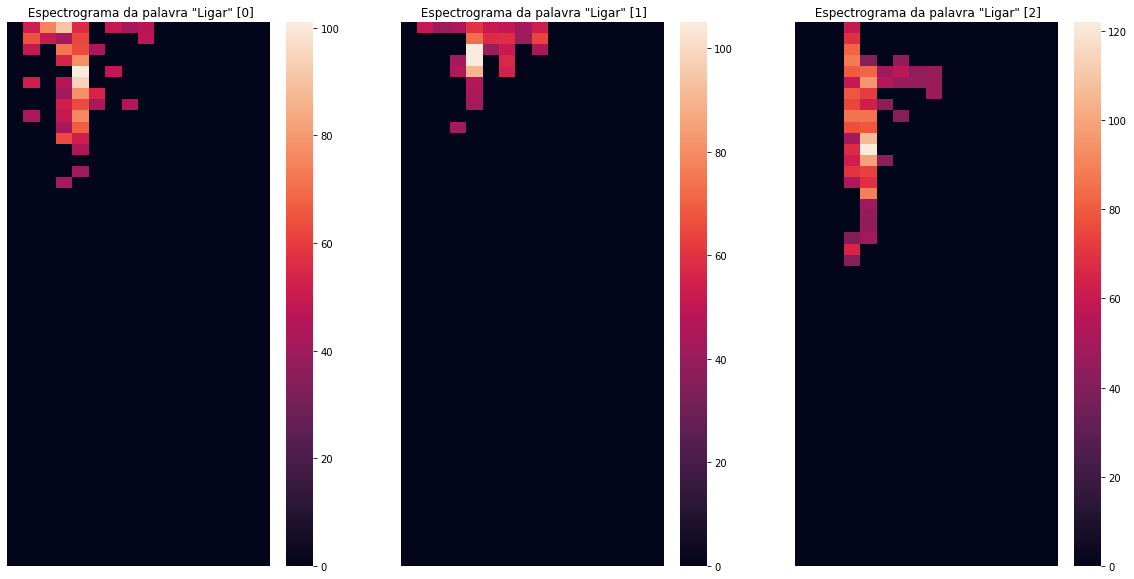

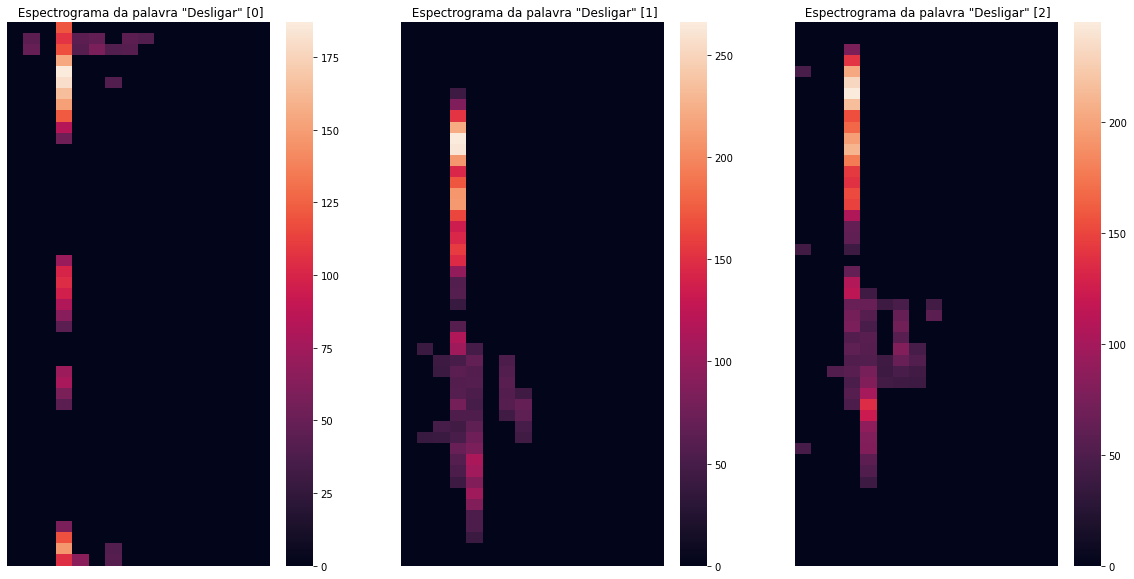

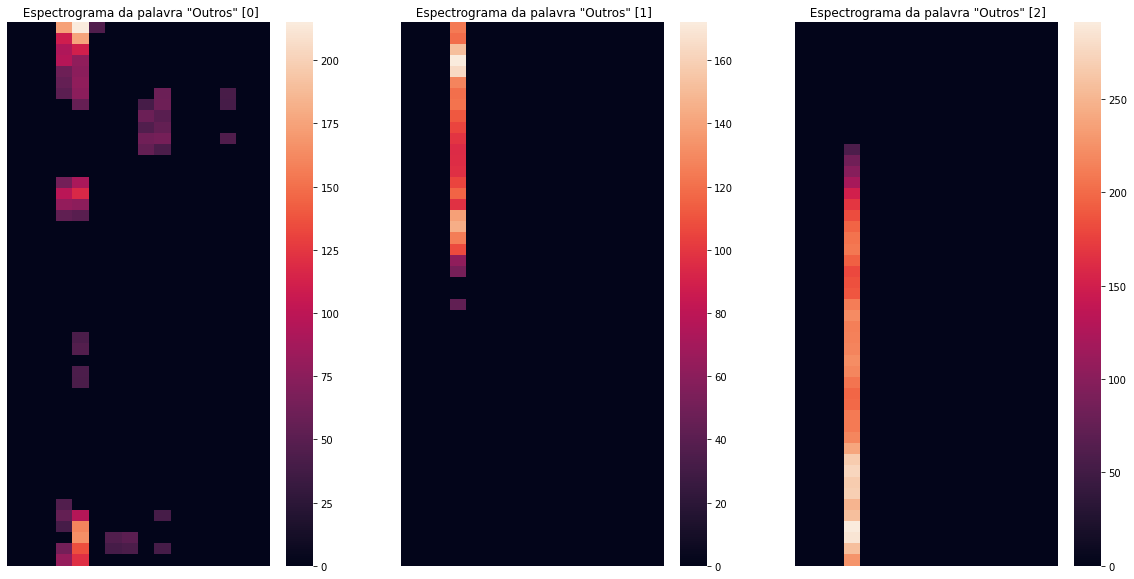

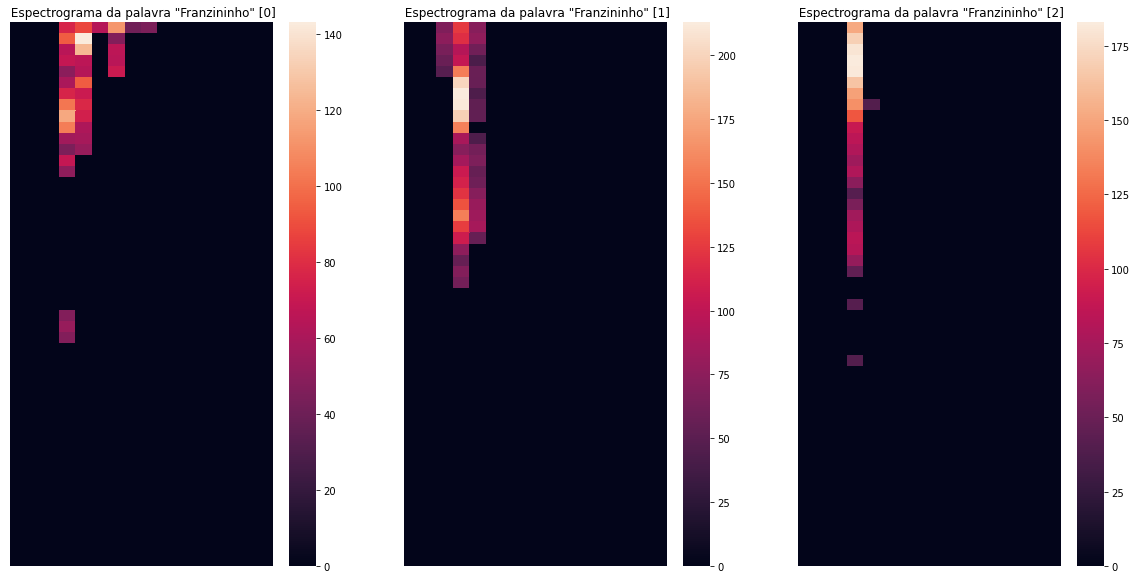

In [ ]:
for i, classe in enumerate(classes):

  files = os.listdir (pathTrain + classe)
  fig, axes = plt.subplots(1, 3, figsize=(20, 10))
  

  for i, ax in enumerate(axes.flatten()):
    ax.axis('off')
    temp_file = genfromtxt(pathTrain + classe + '/' + files[i], delimiter=',')
    sns.heatmap(temp_file.reshape(49, 16), ax=axes[i])
    axes[i].set_xlabel("Tempo", size=14)
    axes[i].set_ylabel("Canais de Freq.", size=14)
    axes[i].title.set_text(" Espectrograma da palavra \"" + classe + "\" [" + str(i) + "]" )



# Dataset DataFrame

In [ ]:
dfTrain = pd.DataFrame(columns=["X", "y"])
valor_max = 0

for i, classe in enumerate(classes):

  files = os.listdir (pathTrain + classe)
  print("{} - {}".format(i, classe))

  for file in files:

    temp_file = genfromtxt(pathTrain + classe + '/' + file, delimiter=',')
    X = temp_file.flatten()
    if X.max() > valor_max:
      valor_max = X.max()
    dfTrain = dfTrain.append({'X': np.array(X.tolist()).astype(np.float32), 'y': i}, ignore_index = True) 

print("Maior valor: ", valor_max)
print("Amostras: ", len(dfTrain))

0 - Ligar
1 - Desligar
2 - Outros
3 - Franzininho
Maior valor:  337.0
Amostras:  1408


In [ ]:
y = dfTrain['y'].values
X = dfTrain['X'].values 

In [ ]:
X_norm = X/255.0

In [ ]:
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_norm, y)

In [ ]:
for i, X in enumerate(X_train):
  X_train[i] = X.reshape(49,16,1)

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)

In [ ]:
for i, X in enumerate(X_test):
  X_test[i] = X.reshape(49,16,1)

In [ ]:
y_test = to_categorical(y_test)

In [ ]:
y_test[0]

array([1., 0., 0., 0.], dtype=float32)

In [ ]:
print("Shape: ",X_train[0].shape)
print("Tipo: ",type(X_train[0][:]))

Shape:  (49, 16, 1)
Tipo:  <class 'numpy.ndarray'>


In [ ]:
print("Shape: ",y_train.shape)
print("Tipo: ",type(y_train[0]))

Shape:  (1056, 4)
Tipo:  <class 'numpy.ndarray'>


In [ ]:
x_train = np.array([np.array(val).astype(float) for val in X_train])
y_train = np.array([np.array(val).astype(float) for val in y_train])

In [ ]:
x_test = np.array([np.array(val).astype(float) for val in X_test])
y_test = np.array([np.array(val).astype(float) for val in y_test])

# Model

In [ ]:
from keras.models import Sequential
from keras.layers import Input, Conv2D, Conv1D, MaxPooling2D, MaxPooling1D, Dense, Flatten, Dropout, Activation
import tensorflow as tf

In [ ]:
model = Sequential()
model.add(Input(shape=(49,16,1,)))
model.add(Conv2D(16,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Flatten())
#model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='softmax'))
#model.add(Dense(5, activation='softmax'))
#model.compile(loss="binary_crossentropy",optimizer="adam",metrics=['accuracy'])
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 47, 14, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 4, 16)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 960)               0         
                                                                 
 dense (Dense)               (None, 8)                 7688      
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
Total params: 7,884
Trainable params: 7,884
Non-trainable params: 0
______________________________________________________

In [ ]:
[print(i.shape, i.dtype) for i in model.inputs]
[print(o.shape, o.dtype) for o in model.outputs]
[print(l.name, l.input_shape, l.dtype) for l in model.layers]

(None, 49, 16, 1) <dtype: 'float32'>
(None, 4) <dtype: 'float32'>
conv2d (None, 49, 16, 1) float32
max_pooling2d (None, 47, 14, 16) float32
flatten (None, 15, 4, 16) float32
dense (None, 960) float32
dense_1 (None, 8) float32


[None, None, None, None, None]

In [ ]:
history = model.fit(x_train, y_train, validation_split=0.1, epochs=100, batch_size=32)

Epoch 1/100
30/30 [==============================] - 1s 15ms/step - loss: 1.3774 - accuracy: 0.2642 - val_loss: 1.3666 - val_accuracy: 0.2642
Epoch 2/100
30/30 [==============================] - 0s 9ms/step - loss: 1.3399 - accuracy: 0.2895 - val_loss: 1.3245 - val_accuracy: 0.2642
Epoch 3/100
30/30 [==============================] - 0s 9ms/step - loss: 1.2930 - accuracy: 0.3211 - val_loss: 1.2732 - val_accuracy: 0.3774
Epoch 4/100
30/30 [==============================] - 0s 10ms/step - loss: 1.2455 - accuracy: 0.4011 - val_loss: 1.2228 - val_accuracy: 0.4528
Epoch 5/100
30/30 [==============================] - 0s 9ms/step - loss: 1.1987 - accuracy: 0.4568 - val_loss: 1.1784 - val_accuracy: 0.4906
Epoch 6/100
30/30 [==============================] - 0s 9ms/step - loss: 1.1515 - accuracy: 0.5095 - val_loss: 1.1378 - val_accuracy: 0.5000
Epoch 7/100
30/30 [==============================] - 0s 9ms/step - loss: 1.1007 - accuracy: 0.5400 - val_loss: 1.1051 - val_accuracy: 0.5189
Epoch 8/100

In [ ]:
model.evaluate(x_train, y_train)

33/33 [==============================] - 0s 5ms/step - loss: 0.3058 - accuracy: 0.8920


[0.305832177400589, 0.8920454382896423]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


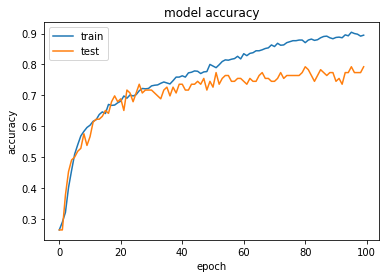

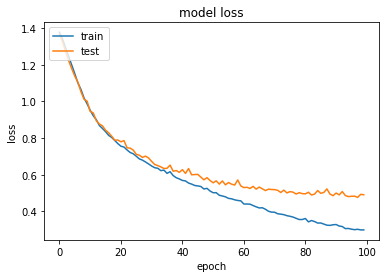

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
probabilities = model.predict(x_test)
y_pred = np.argmax(probabilities, axis=1)
print(y_pred)

[3 0 0 3 3 2 3 0 0 0 0 0 2 0 1 0 0 1 0 0 0 1 2 2 3 1 1 2 2 0 1 3 1 3 1 0 3
 3 0 3 2 2 3 3 1 1 2 0 1 0 2 0 1 2 2 1 1 2 3 0 0 1 0 0 3 3 0 3 2 3 0 2 0 0
 2 1 0 2 1 2 2 1 0 2 1 1 1 1 3 2 2 1 0 2 3 3 3 0 3 1 0 2 2 2 3 1 2 3 1 2 2
 2 2 2 1 2 2 0 1 2 0 0 3 2 2 0 2 1 2 3 2 0 3 2 3 0 0 2 2 3 0 0 0 3 3 3 0 3
 1 1 2 2 0 0 3 1 0 1 0 3 2 1 2 0 3 2 2 0 3 1 2 1 0 1 3 2 3 3 3 1 1 1 3 2 3
 2 0 2 0 0 0 2 3 3 3 0 1 2 3 3 1 3 0 3 1 1 2 0 1 3 1 1 0 1 3 2 0 2 0 0 1 3
 2 0 1 2 1 2 2 1 2 3 2 0 1 1 3 2 1 2 2 3 2 3 1 3 3 1 3 3 0 1 3 2 0 2 2 2 0
 3 0 1 3 0 3 2 0 3 0 0 2 2 3 0 2 1 2 0 3 2 0 0 3 0 0 1 3 2 3 3 0 3 3 3 0 1
 3 1 1 2 0 0 2 0 3 0 0 2 3 1 1 0 3 0 0 3 0 0 3 3 1 2 0 3 1 3 0 1 3 1 1 1 3
 2 0 3 1 0 1 2 0 1 2 2 1 2 0 2 0 0 3 3]


In [ ]:
i=4
#print(" 0:{:.2f}%\n 1:{:.2f}%\n 2:{:.2f}%\n 3:{:.2f}%\n 4:{:.2f}%".format(probabilities[i][0]*100,probabilities[i][1]*100,probabilities[i][2]*100,probabilities[i][3]*100,probabilities[i][4]*100))
print(" 0:{:.2f}%\n 1:{:.2f}%\n 2:{:.2f}%\n 3:{:.2f}%".format(probabilities[i][0]*100,probabilities[i][1]*100,probabilities[i][2]*100,probabilities[i][3]*100))

 0:0.93%
 1:0.85%
 2:14.76%
 3:83.46%


In [ ]:
y_pred

array([3, 0, 0, 3, 3, 2, 3, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       2, 2, 3, 1, 1, 2, 2, 0, 1, 3, 1, 3, 1, 0, 3, 3, 0, 3, 2, 2, 3, 3,
       1, 1, 2, 0, 1, 0, 2, 0, 1, 2, 2, 1, 1, 2, 3, 0, 0, 1, 0, 0, 3, 3,
       0, 3, 2, 3, 0, 2, 0, 0, 2, 1, 0, 2, 1, 2, 2, 1, 0, 2, 1, 1, 1, 1,
       3, 2, 2, 1, 0, 2, 3, 3, 3, 0, 3, 1, 0, 2, 2, 2, 3, 1, 2, 3, 1, 2,
       2, 2, 2, 2, 1, 2, 2, 0, 1, 2, 0, 0, 3, 2, 2, 0, 2, 1, 2, 3, 2, 0,
       3, 2, 3, 0, 0, 2, 2, 3, 0, 0, 0, 3, 3, 3, 0, 3, 1, 1, 2, 2, 0, 0,
       3, 1, 0, 1, 0, 3, 2, 1, 2, 0, 3, 2, 2, 0, 3, 1, 2, 1, 0, 1, 3, 2,
       3, 3, 3, 1, 1, 1, 3, 2, 3, 2, 0, 2, 0, 0, 0, 2, 3, 3, 3, 0, 1, 2,
       3, 3, 1, 3, 0, 3, 1, 1, 2, 0, 1, 3, 1, 1, 0, 1, 3, 2, 0, 2, 0, 0,
       1, 3, 2, 0, 1, 2, 1, 2, 2, 1, 2, 3, 2, 0, 1, 1, 3, 2, 1, 2, 2, 3,
       2, 3, 1, 3, 3, 1, 3, 3, 0, 1, 3, 2, 0, 2, 2, 2, 0, 3, 0, 1, 3, 0,
       3, 2, 0, 3, 0, 0, 2, 2, 3, 0, 2, 1, 2, 0, 3, 2, 0, 0, 3, 0, 0, 1,
       3, 2, 3, 3, 0, 3, 3, 3, 0, 1, 3, 1, 1, 2, 0,

In [ ]:
from numpy import argmax
y_true = []

for i,y in enumerate(y_test):
  y_true.append(argmax(y_test[i]))

In [ ]:
print(y_true)

[0, 0, 3, 2, 3, 0, 2, 0, 3, 0, 0, 0, 2, 0, 1, 0, 1, 1, 0, 0, 0, 1, 2, 3, 3, 3, 1, 2, 2, 1, 1, 3, 1, 2, 1, 2, 1, 3, 0, 2, 2, 2, 3, 2, 1, 0, 2, 0, 1, 0, 2, 1, 1, 2, 2, 1, 2, 2, 3, 1, 0, 1, 2, 0, 3, 2, 0, 1, 2, 3, 0, 2, 0, 1, 3, 1, 0, 2, 1, 2, 2, 1, 0, 2, 1, 1, 1, 1, 3, 2, 0, 1, 0, 2, 0, 3, 3, 0, 2, 1, 3, 2, 2, 1, 3, 1, 2, 3, 1, 1, 2, 2, 2, 2, 3, 2, 2, 0, 1, 2, 0, 1, 2, 3, 2, 3, 2, 1, 2, 3, 2, 0, 3, 2, 3, 0, 0, 0, 2, 3, 2, 0, 0, 2, 2, 3, 1, 3, 1, 1, 2, 2, 2, 0, 3, 1, 1, 1, 3, 2, 2, 1, 2, 0, 3, 2, 2, 0, 3, 1, 0, 1, 2, 1, 2, 2, 0, 3, 2, 1, 2, 1, 3, 2, 2, 2, 1, 2, 1, 3, 0, 2, 3, 3, 3, 0, 1, 2, 3, 3, 0, 3, 0, 3, 1, 3, 1, 2, 1, 3, 1, 1, 1, 1, 3, 1, 0, 2, 0, 0, 1, 3, 2, 0, 1, 2, 1, 2, 2, 1, 2, 3, 3, 0, 3, 1, 0, 2, 1, 2, 2, 3, 0, 3, 1, 3, 3, 2, 3, 3, 1, 1, 3, 2, 0, 1, 3, 2, 0, 1, 0, 0, 3, 0, 3, 2, 2, 3, 2, 1, 2, 2, 3, 1, 2, 1, 2, 2, 3, 1, 0, 0, 3, 0, 0, 1, 3, 2, 2, 2, 0, 3, 3, 3, 0, 1, 3, 1, 1, 2, 1, 0, 2, 0, 3, 0, 1, 3, 0, 1, 0, 0, 2, 0, 2, 3, 0, 0, 3, 2, 1, 0, 2, 3, 1, 2, 0, 0, 2, 1, 1, 1, 2, 

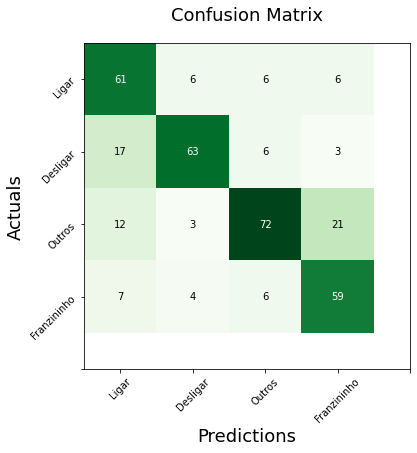

In [ ]:
from mlxtend.plotting import plot_confusion_matrix

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_true, y_pred)

#print(conf_matrix)
 
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.xticks([0, 1, 2, 3, 4], classes, rotation=45) 
plt.yticks([0, 1, 2, 3, 4], classes, rotation=45) 
plt.show()

# Teste

In [ ]:
i=50

X_test1 = X_train[i]
probabilities = model.predict(np.array([X_test1]) )

print("Prediction:")
#print(" 0:{:.2f}%\n 1:{:.2f}%\n 2:{:.2f}%\n 3:{:.2f}%\n 4:{:.2f}%".format(probabilities[0][0]*100,probabilities[0][1]*100,probabilities[0][2]*100,probabilities[0][3]*100,probabilities[0][4]*100))
print(" 0:{:.2f}%\n 1:{:.2f}%\n 2:{:.2f}%\n 3:{:.2f}%".format(probabilities[0][0]*100,probabilities[0][1]*100,probabilities[0][2]*100,probabilities[0][3]*100))
print("True: ", y_train[i])

Prediction:
 0:43.43%
 1:31.16%
 2:6.11%
 3:19.30%
True:  [0. 1. 0. 0.]


#Gerar arquivo teste para o arduino

In [ ]:
with open('x_test.h', 'w') as f:
  for i, classe in enumerate(classes):
    print("//{} - {}".format(i, classe), file=f)

  for test in range(5):

    print("\nfloat test_%d[784] = {" % (test), file=f)    # 46 * 16 = 780
    s="    "
    for i in range(49):
        for j in range(16):
          if j == 15 and i == 48:
            s+=str(X_train[test][i][j][0])
          else:
            s+=str(X_train[test][i][j][0])+', '
        print(s, file=f)     
        s="    "
    print("};\n", file=f)

    print("float y_%d = %d; //%s\n" % (test, argmax(y_train[test]), classes[argmax(y_train[test])]), file=f)

f.close()

In [ ]:
!cat x_test.h

//0 - Ligar
//1 - Desligar
//2 - Outros
//3 - Franzininho

float test_0[784] = {
    0.0, 0.0, 0.0, 0.21568628, 0.20392157, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
    0.0, 0.0, 0.0, 0.20392157, 0.29803923, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
    0.0, 0.0, 0.0, 0.1764706, 0.29803923, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
    0.0, 0.0, 0.0, 0.17254902, 0.27450982, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
    0.0, 0.0, 0.0, 0.1882353, 0.32941177, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
    0.0, 0.0, 0.0, 0.19607843, 0.3764706, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
    0.0, 0.0, 0.0, 0.19215687, 0.38039216, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
    0.0, 0.0, 0.0, 0.18039216, 0.3372549, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
    0.0, 0.0, 0.0, 0.17254902, 0.26666668, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
    0.0, 0.0, 0.0, 0.21176471, 0

#2.1. Instalar TinyML Gen 

In [ ]:
!pip install tinymlgen

  Created wheel for tinymlgen: filename=tinymlgen-0.2-py3-none-any.whl size=2242 sha256=1c7a33599799c4be1df083dffd0b12d8fc137b7fbcbf31562885c622b1118917
  Stored in directory: /root/.cache/pip/wheels/1c/94/c7/a18049eea10532c9975ad7353fcccc7c436673285b4723a4bb
  Created wheel for hexdump: filename=hexdump-3.3-py3-none-any.whl size=8913 sha256=e71376a784640b1e8c1c6ba2b4fde9ce6c1d8b75a8e4a2bd938f717408680c12
  Stored in directory: /root/.cache/pip/wheels/68/fe/aa/06fd9d6968cfc3e1926eeab1ec728c246dafa120a72ff9afae
Successfully built tinymlgen hexdump


In [ ]:
from tinymlgen import port

# 8. Converção de Modelo

In [ ]:
c_code = port(model, variable_name='model', pretty_print=True, optimize=False)
#print(c_code)
with open('model.h', 'w') as f:
    print(c_code, file=f)

INFO:tensorflow:Assets written to: /tmp/tmpfv4t61hp/assets


In [ ]:
!echo "//21/12/2021" >> model.h

In [ ]:
!cat model.h


#ifdef __has_attribute
#define HAVE_ATTRIBUTE(x) __has_attribute(x)
#else
#define HAVE_ATTRIBUTE(x) 0
#endif
#if HAVE_ATTRIBUTE(aligned) || (defined(__GNUC__) && !defined(__clang__))
#define DATA_ALIGN_ATTRIBUTE __attribute__((aligned(4)))
#else
#define DATA_ALIGN_ATTRIBUTE
#endif

const unsigned char model[] DATA_ALIGN_ATTRIBUTE = {
	0x1c, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x14, 0x00, 0x20, 0x00, 
	0x04, 0x00, 0x08, 0x00, 0x0c, 0x00, 0x10, 0x00, 0x14, 0x00, 0x00, 0x00, 
	0x18, 0x00, 0x1c, 0x00, 0x14, 0x00, 0x00, 0x00, 0x03, 0x00, 0x00, 0x00, 
	0x18, 0x00, 0x00, 0x00, 0x2c, 0x00, 0x00, 0x00, 0x40, 0x01, 0x00, 0x00, 
	0x2c, 0x00, 0x00, 0x00, 0xe8, 0x00, 0x00, 0x00, 0x68, 0x00, 0x00, 0x00, 
	0x05, 0x00, 0x00, 0x00, 0xc8, 0x05, 0x00, 0x00, 0xe4, 0x04, 0x00, 0x00, 
	0x1c, 0x04, 0x00, 0x00, 0x58, 0x03, 0x00, 0x00, 0xfc, 0x01, 0x00, 0x00, 
	0x01, 0x00, 0x00, 0x00, 0x38, 0x01, 0x00, 0x00, 0x10, 0x00, 0x00, 0x00, 
	0x34, 0x84, 0x00, 0x00, 0x30, 0x84, 0x00, 0x00, 0x50, 0x83, 0x00, 0x00

Função optimezi não está funcionando.

const int model_len = 34080;

TENSOR_ARENA_SIZE > 34Kb 
48*1024 = 48kB

Maximo testado foi 96Kb no ESP32

# Download de arquivos

In [ ]:
from google.colab import files

files.download('model.h')
files.download('x_test.h')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>